In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Set 2 Model: Logistic Regression with Mean Texture, Worst Area, and Worst Smoothness

**Objective:** The model I'm working on has the following features selected ('mean texture', 'worst area', 'worst smoothness') to predict breast cancer diagnosis (malignant/benign) from the UCI Breast Cancer dataset.

**Methodology:**
*   **Features:** 'mean texture', 'worst area', 'worst smoothness'
*   **Model:** Logistic Regression implemented from scratch.
*   **Training:** Full-batch gradient descent.
*   **Loss Function:** Log Loss (Binary Cross-Entropy).
*   **Data Split:** 75% training, 25% testing.
*   **Evaluation Metric:** Accuracy Score.
*   **Initial Hyperparameters (can be varied):**
    *   Learning Rate: 0.25
    *   Epochs: 10

Starting model training...


Training complete.
Final trained weights (including bias): [ 0.24470197 -0.33575494 -0.63524737 -0.35317249]

Evaluating model on the test set...

Model Accuracy on Test Set for Set 2 (Mean Texture, Worst Area, Worst Smoothness): 0.9371


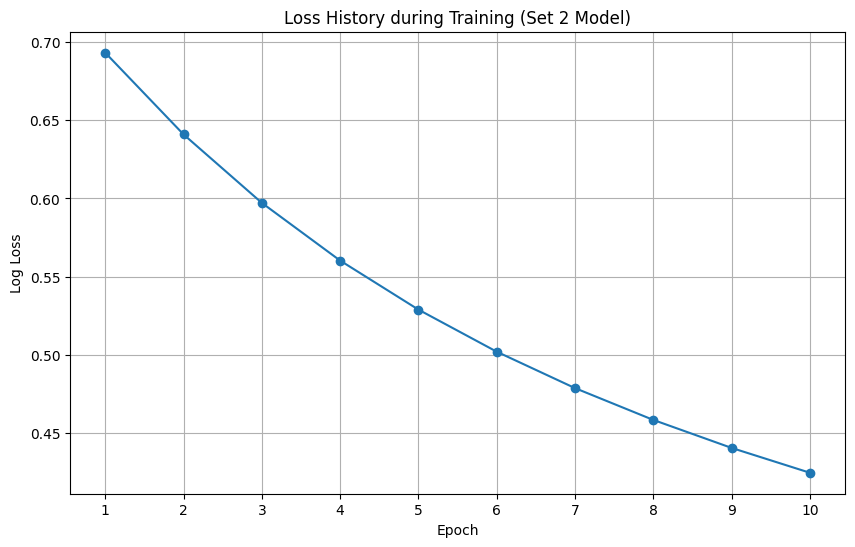


--- End of Set 2 Model ---


In [25]:

# Load the dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0 for malignant, 1 for benign

# set 2 features
original_set2_feature_names_with_spaces = ['mean texture', 'worst area', 'worst smoothness']
api_set2_feature_names_with_underscores = ['mean_texture', 'worst_area', 'worst_smoothness']
X = df[original_set2_feature_names_with_spaces]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#intercept term (for bias) to the scaled features
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# 2. Logistic Regression Model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred_proba):
    epsilon = 1e-15  # Small constant to prevent log(0) or log(1) issues
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)).mean()

def logistic_regression_train(X, y, learning_rate, epochs):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    loss_history = []
    for epoch in range(epochs):
        # Linear combination of features and weights
        z = np.dot(X, weights)
        
        # Predicted probabilities using sigmoid function
        y_pred_proba = sigmoid(z)
        
        # Calculate loss
        current_loss = log_loss(y, y_pred_proba)
        loss_history.append(current_loss)
        
        # Calculate gradient (derivative of log loss w.r.t weights)
        # For full-batch, the gradient is the average over all samples
        gradient = np.dot(X.T, (y_pred_proba - y)) / num_samples
        
        # Update weights
        weights -= learning_rate * gradient
        
    return weights, loss_history

def predict_log_reg(X, weights):
    z = np.dot(X, weights)
    y_pred_proba = sigmoid(z)
    return (y_pred_proba >= 0.5).astype(int)

# 3. Train the Model
learning_rate = 0.25
epochs = 10

# Convert y_train to numpy array if it's a Pandas Series for consistency
y_train_values = y_train.values 

print("Starting model training...\n")
trained_weights, training_loss_history = logistic_regression_train(X_train_scaled, y_train_values, learning_rate, epochs)
print("\nTraining complete.")
print(f"Final trained weights (including bias): {trained_weights}")

# 4. Evaluate the Model
print("\nEvaluating model on the test set...")
y_pred_test = predict_log_reg(X_test_scaled, trained_weights)

# Convert y_test to numpy array if it's a Pandas Series
y_test_values = y_test.values

accuracy = accuracy_score(y_test_values, y_pred_test)
print(f'\nModel Accuracy on Test Set for Set 2 (Mean Texture, Worst Area, Worst Smoothness): {accuracy:.4f}')

# 5. Plot Loss History (Optional)
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), training_loss_history, marker='o', linestyle='-')
plt.title('Loss History during Training (Set 2 Model)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

print("\n--- End of Set 2 Model ---")



### 6. Logistic Regression using Scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression

# so we use the scaled features without the manually added intercept column.
X_train_sklearn = scaler.transform(X_train)
X_test_sklearn = scaler.transform(X_test)

# Initialize and train the sklearn Logistic Regression model
# solver='liblinear' is often a good choice for small datasets.
sklearn_log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model using the scaled training data and original y_train
sklearn_log_reg.fit(X_train_sklearn, y_train)

# Make predictions on the scaled test set
y_pred_test_sklearn = sklearn_log_reg.predict(X_test_sklearn)

# Evaluate the model
accuracy_sklearn = accuracy_score(y_test, y_pred_test_sklearn)

# intercept and coefficients
sklearn_weights_combined = np.hstack((sklearn_log_reg.intercept_, sklearn_log_reg.coef_[0]))

# --- Outputting in a similar format to the custom model ---
print(f"Final trained weights (including bias) from sklearn: {sklearn_weights_combined}")
print(f"Model Accuracy on Test Set for Set 2 ({', '.join(features_set2)}) using Sklearn: {accuracy_sklearn:.4f}")

print("\n--- End of Scikit-learn Logistic Regression Model (Formatted Output) ---")

Final trained weights (including bias) from sklearn: [ 0.23602613 -1.04109108 -4.91882231 -1.47954996]
Model Accuracy on Test Set for Set 2 (mean texture, worst area, worst smoothness) using Sklearn: 0.9720

--- End of Scikit-learn Logistic Regression Model (Formatted Output) ---


### 7. Neural Network Model using Keras/TensorFlow

Neural Network Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)


Starting Neural Network model training...
Epoch 1/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8160 - loss: 0.4934 - val_accuracy: 0.9535 - val_loss: 0.2435
Epoch 2/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9750 - loss: 0.1747 - val_accuracy: 0.9884 - val_loss: 0.1404
Epoch 3/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9883 - loss: 0.0992 - val_accuracy: 0.9884 - val_loss: 0.1042
Epoch 4/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9673 - loss: 0.1012 - val_accuracy: 0.9884 - val_loss: 0.0970
Epoch 5/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9708 - loss: 0.1171 - val_accuracy: 0.9884 - val_loss: 0.0805
Epoch 6/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9705 - loss: 0.1132 - val_accuracy: 0.9884 - val_loss: 0.0840
Epoch 7/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9733 - loss: 0.0860 - val_accuracy: 0.9884 - val_loss: 0.0772
Epoch 8/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 422u

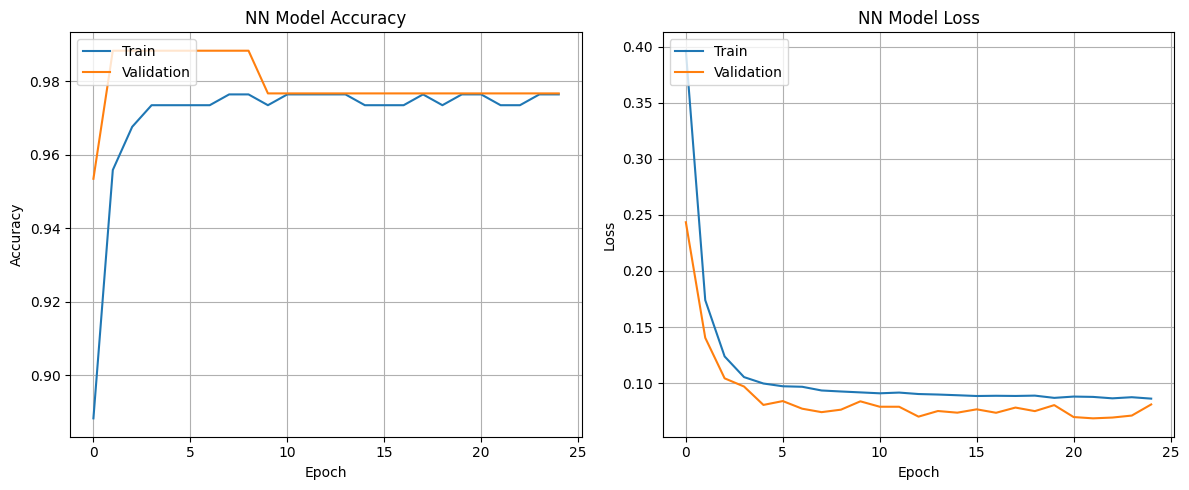


--- End of Neural Network Model (Keras/TensorFlow) ---


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
# Ensure X_train_sklearn, y_train, X_test_sklearn, y_test are the scaled versions WITHOUT manual intercept
# (e.g., X_train_sklearn = X_train_scaled_original_logreg from above if running sequentially)

# Define the Neural Network Model
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_for_sklearn_logreg.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Initial Neural Network Model Summary:")
nn_model.summary()

epochs_nn = 50 # As per your last successful run
batch_size_nn = 1 # As per your last successful run
print("\nStarting Initial Neural Network model training...")

y_train_np_nn = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
y_test_np_nn = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)


history_nn = nn_model.fit(X_train_for_sklearn_logreg, y_train_np_nn, 
                            epochs=epochs_nn, 
                            batch_size=batch_size_nn, 
                            validation_split=0.2,
                            verbose=1)
print("\nInitial Neural Network Training complete.")

print("\nEvaluating Initial Neural Network model on the test set...")
loss_nn, accuracy_nn = nn_model.evaluate(X_test_for_sklearn_logreg, y_test_np_nn, verbose=0)
print(f'\nModel Accuracy on Test Set for Set 2 (Initial Neural Network): {accuracy_nn:.4f}')

# Get predictions for detailed metrics
y_pred_proba_nn = nn_model.predict(X_test_for_sklearn_logreg)
y_pred_labels_nn = (y_pred_proba_nn > 0.5).astype("int32")
print_detailed_metrics(y_test_np_nn, y_pred_labels_nn, model_name="Set 2 Initial Neural Network")

# Plot training & validation accuracy/loss
if hasattr(history_nn, 'history') and 'accuracy' in history_nn.history:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_nn.history['accuracy'])
    plt.plot(history_nn.history['val_accuracy'])
    plt.title('Initial NN Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_nn.history['loss'])
    plt.plot(history_nn.history['val_loss'])
    plt.title('Initial NN Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- End of Initial Neural Network Model (Keras/TensorFlow) ---")

### 8. Hyperparameter Tuning for Neural Network Model

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.9883720874786377

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 21s
KerasTuner search complete.

Best hyperparameters found: 
Input Units: 8
Hidden Units: 16
Learning Rate: 0.01
Optimizer: adam

Building the best model with optimal hyperparameters...

Retraining the best model on the full training data...
Epoch 1/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8254 - loss: 0.3229 - val_accuracy: 0.9535 - val_loss: 0.1118
Epoch 2/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9625 - loss: 0.1478 - val_accuracy: 0.9302 - val_loss: 0.1801
Epoch 3/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9681 - loss: 0.0913 - val_accuracy: 0.9651 - val_loss: 0.1412
Epoch 4/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9811 - loss: 0.1122 - val_accuracy: 0.9651 - val_loss: 0.0835
Epoch 5/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9799 - loss: 0.0605 - val_accuracy: 0.93

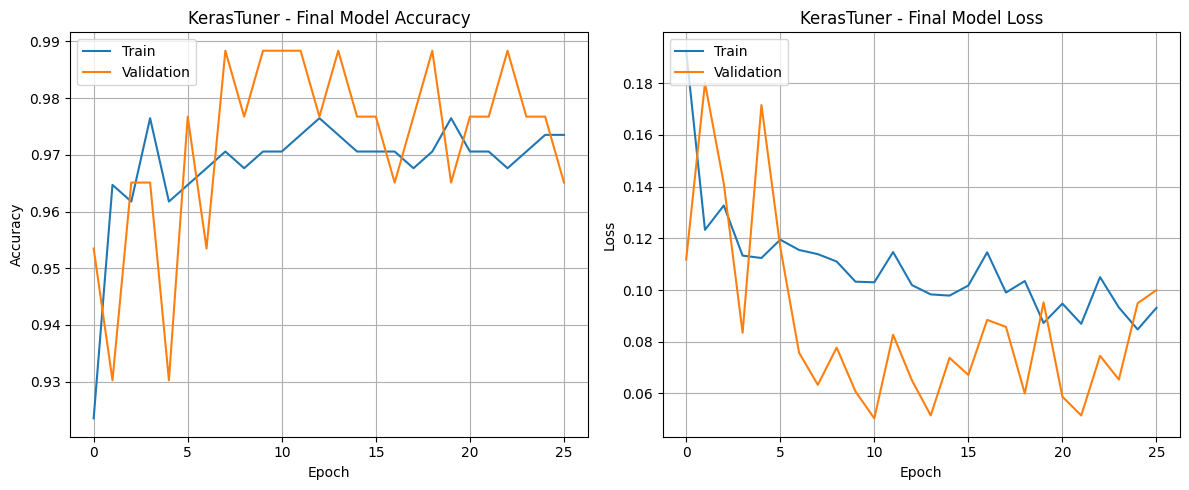


--- End of Neural Network Hyperparameter Tuning with KerasTuner ---


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported

# Ensure X_train_sklearn, y_train, X_test_sklearn, y_test are defined from previous cells

def build_model_kt(hp):
    model = Sequential()
    model.add(keras.Input(shape=(X_train_sklearn.shape[1],))) # Use keras.Input
    
    # Tune the number of units in the first Dense layer
    hp_units_input = hp.Int('units_input', min_value=8, max_value=32, step=8)
    model.add(Dense(units=hp_units_input, activation='relu'))
    
    # Tune the number of units in the second Dense layer
    hp_units_hidden = hp.Int('units_hidden', min_value=4, max_value=16, step=4)
    model.add(Dense(units=hp_units_hidden, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    
    # Tune the optimizer
    optimizer_name = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = RMSprop(learning_rate=hp_learning_rate)
        
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner (RandomSearch). 
# For a more exhaustive search, consider kt.Hyperband or kt.BayesianOptimization
tuner = kt.RandomSearch(
    build_model_kt,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try (e.g., 10-20)
    executions_per_trial=1, # Number of models to train per trial (e.g., 1-3 for robustness)
    directory='keras_tuner_dir', # Directory to store logs and checkpoints
    project_name='set2_nn_tuning',
    overwrite=True)

# Prepare y_train and y_test as NumPy arrays (good practice)
y_train_np_kt = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
y_test_np_kt = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)


print("Starting KerasTuner search...")
# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # Increased patience

# using keras tuner because of compatibility issues with scikit-learn and tf
tuner.search(X_train_sklearn, 
             y_train_np_kt, 
             epochs=50, # Epochs for each trial
             validation_split=0.2, 
             callbacks=[stop_early], 
             verbose=1)
print("KerasTuner search complete.")

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\nBest hyperparameters found: ")
print(f"Input Units: {best_hps.get('units_input')}")
print(f"Hidden Units: {best_hps.get('units_hidden')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
# If you tune batch_size with KerasTuner, print it: best_hps.get('batch_size')

# Build the model with the optimal hyperparameters
print("\nBuilding the best model with optimal hyperparameters...")
final_best_model = tuner.hypermodel.build(best_hps)

# Retrain the best model on the full training data (or a larger portion) for potentially more epochs
print("\nRetraining the best model on the full training data...")

final_epochs = 100 
final_batch_size = best_hps.get('batch_size') if 'batch_size' in best_hps.values else 1 # Use tuned batch_size or default to 1 or 32

history_final_best = final_best_model.fit(X_train_sklearn, 
                                          y_train_np_kt, 
                                          epochs=final_epochs, 
                                          batch_size=final_batch_size, # Apply best batch size if tuned, or a good default
                                          validation_split=0.2, 
                                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)], # Higher patience for final training
                                          verbose=1)
print("Final model training complete.")

# Evaluate the best model on the test set
loss_kt, accuracy_kt = final_best_model.evaluate(X_test_sklearn, y_test_np_kt, verbose=0)
print(f'\nModel Accuracy on Test Set for Set 2 (KerasTuner NN): {accuracy_kt:.4f}')

# Plot training & validation accuracy values for the final best model
if hasattr(history_final_best, 'history') and 'accuracy' in history_final_best.history:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_final_best.history['accuracy'])
    plt.plot(history_final_best.history['val_accuracy'])
    plt.title('KerasTuner - Final Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss values for the final best model
    plt.subplot(1, 2, 2)
    plt.plot(history_final_best.history['loss'])
    plt.plot(history_final_best.history['val_loss'])
    plt.title('KerasTuner - Final Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Could not plot training history: history object not found or metrics missing.")

print("\n--- End of Neural Network Hyperparameter Tuning with KerasTuner ---")

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# --- Configuration for this section ---
num_iterations = 3  # How many different random feature sets to try
num_random_features = 4 # How many features to randomly select in each set
nn_epochs = 25      # Epochs for training each NN model
nn_batch_size = 1   # Batch size for training each NN model
# --- End Configuration ---

print("--- Starting Neural Network Training on Random Feature Subsets ---")

# Load the full dataset again to access all feature names
cancer_full = load_breast_cancer()
df_full = pd.DataFrame(data=cancer_full.data, columns=cancer_full.feature_names)
df_full['target'] = cancer_full.target
all_feature_names = cancer_full.feature_names

# Ensure y (target) is defined and consistent
y_full = df_full['target']

def create_nn_model_dynamic(input_dim, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(input_dim,))) # Use Input layer
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else: # Default to Adam if specified optimizer is not handled
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def calculate_and_print_metrics(y_true, y_pred_proba, y_pred_binary, feature_subset_name="Current Subset"):
    """Calculates and prints detailed classification metrics."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()

    accuracy = accuracy_score(y_true, y_pred_binary)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Sensitivity/Recall)
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate
    precision = precision_score(y_true, y_pred_binary, zero_division=0)

    # Matthews Correlation Coefficient (MCC)
    mcc_numerator = (tp * tn) - (fp * fn)
    mcc_denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = mcc_numerator / mcc_denominator if mcc_denominator > 0 else 0

    print(f"\n--- Metrics for Feature Subset: {feature_subset_name} ---")
    print(f"Accuracy:            {accuracy:.5f}")
    print(f"True positive rate:  {tpr:.5f} (Sensitivity/Recall)")
    print(f"True negative rate:  {tnr:.5f} (Specificity)")
    print(f"False positive rate: {fpr:.5f}")
    print(f"False negative rate: {fnr:.5f}")
    print(f"Precision:           {precision:.5f}")
    print(f"MCC:                 {mcc:.5f}")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print("----------------------------------------------------")
    return {
        "features": feature_subset_name,
        "accuracy": accuracy, "tpr": tpr, "tnr": tnr,
        "fpr": fpr, "fnr": fnr, "precision": precision, "mcc": mcc
    }

results_summary = []

for i in range(num_iterations):
    print(f"\n===== Iteration {i+1}/{num_iterations} =====")

    # 1. Randomly select features
    selected_feature_indices = np.random.choice(len(all_feature_names), num_random_features, replace=False)
    current_selected_features = all_feature_names[selected_feature_indices]
    print(f"Selected features: {list(current_selected_features)}")

    X_subset = df_full[current_selected_features]

    # 2. Split and Scale data for the current feature subset
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
        X_subset, y_full, test_size=0.25, random_state=42 + i # Vary random state for splits
    )
    scaler_sub = StandardScaler()
    X_train_scaled_sub = scaler_sub.fit_transform(X_train_sub)
    X_test_scaled_sub = scaler_sub.transform(X_test_sub)

    # 3. Define and Train NN model
    print(f"Training Neural Network with {num_random_features} features ({', '.join(current_selected_features)})...")
    nn_model_sub = create_nn_model_dynamic(input_dim=X_train_scaled_sub.shape[1])
    # nn_model_sub.summary() # Optional: print model summary for each iteration

    history_sub = nn_model_sub.fit(
        X_train_scaled_sub, y_train_sub,
        epochs=nn_epochs,
        batch_size=nn_batch_size,
        validation_split=0.2, # Using a small validation split during training
        verbose=0 # Set to 1 or 2 if you want to see epoch-by-epoch training progress
    )
    print("Training complete.")

    # 4. Evaluate on the test set for this subset
    y_pred_proba_nn_sub = nn_model_sub.predict(X_test_scaled_sub).ravel()
    y_pred_binary_nn_sub = (y_pred_proba_nn_sub > 0.5).astype(int)

    metrics = calculate_and_print_metrics(y_test_sub, y_pred_proba_nn_sub, y_pred_binary_nn_sub, ', '.join(current_selected_features))
    results_summary.append(metrics)

    # Optional: Plot loss for this iteration
    # plt.figure(figsize=(8, 4))
    # plt.plot(history_sub.history['loss'], label='Train Loss')
    # plt.plot(history_sub.history['val_loss'], label='Val Loss')
    # plt.title(f'NN Loss - Iteration {i+1} ({num_random_features} features)')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()

print("\n===== Summary of All Iterations =====")
for res in results_summary:
    print(f"Features: {res['features']} | Accuracy: {res['accuracy']:.4f} | MCC: {res['mcc']:.4f}")

print("\n--- End of Neural Network Training on Random Feature Subsets ---")


--- Starting Neural Network Training on Random Feature Subsets ---

===== Iteration 1/3 =====
Selected features: ['mean texture', 'mean compactness', 'mean fractal dimension', 'radius error']
Training Neural Network with 4 features (mean texture, mean compactness, mean fractal dimension, radius error)...
Training complete.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

--- Metrics for Feature Subset: mean texture, mean compactness, mean fractal dimension, radius error ---
Accuracy:            0.95105
True positive rate:  0.96629 (Sensitivity/Recall)
True negative rate:  0.92593 (Specificity)
False positive rate: 0.07407
False negative rate: 0.03371
Precision:           0.95556
MCC:                 0.89558
TP: 86, FP: 4, TN: 50, FN: 3
----------------------------------------------------

===== Iteration 2/3 =====
Selected features: ['mean compactness', 'worst texture', 'mean smoothness', 'worst concavity']
Training Neural Network with 4 features (mean compactness, worst texture, mean smoothness

### 10. Neural Network Model using All 30 Features

In this section, we train and evaluate the Keras neural network using all 30 available features from the breast cancer dataset. This will serve as a comparison point to models trained on specific feature subsets.

--- Loading and Preparing Data for All 30 Features ---
Shape of X_train_scaled_all: (426, 30)
Shape of X_test_scaled_all: (143, 30)
Data preparation complete.

--- Defining Neural Network Model for All 30 Features ---
Neural Network Model Summary (All 30 Features):


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Neural Network Model Training (All 30 Features) ---
Epoch 1/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.7481 - loss: 0.5022 - val_accuracy: 0.9651 - val_loss: 0.1765
Epoch 2/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9841 - loss: 0.1421 - val_accuracy: 0.9884 - val_loss: 0.1003
Epoch 3/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9833 - loss: 0.0799 - val_accuracy: 0.9767 - val_loss: 0.0792
Epoch 4/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9891 - loss: 0.0509 - val_accuracy: 0.9884 - val_loss: 0.0658
Epoch 5/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9948 - loss: 0.0429 - val_accuracy: 0.9884 - val_loss: 0.0621
Epoch 6/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9936 - loss: 0.0373 - val_accuracy: 0.9651 - val_loss: 0.0617
Epoch 7/50
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9867 - loss: 0.0506 - val_accuracy: 0.9884 - val_loss: 0.0548
Epoch 8/50
340/340 ━━━━━

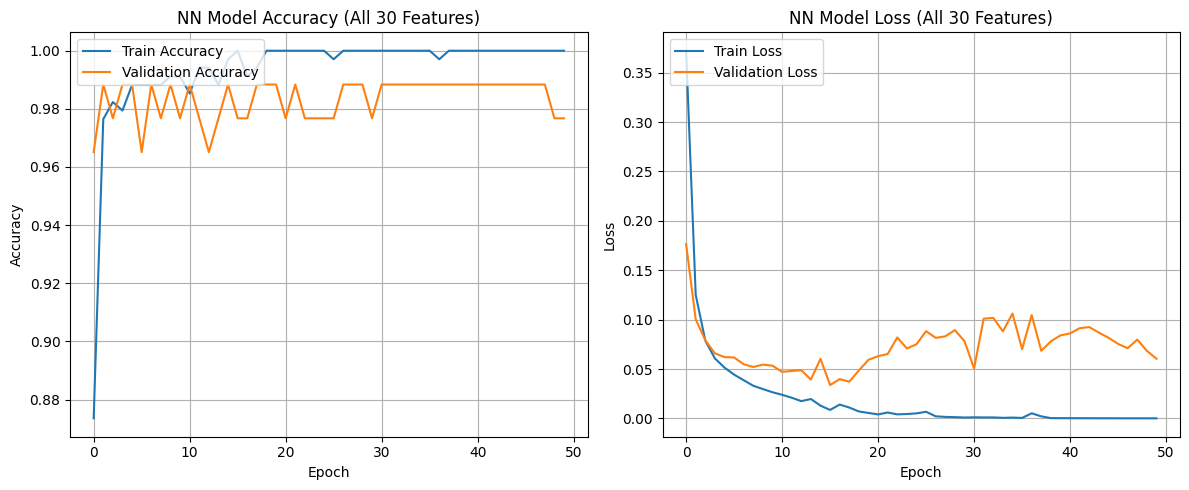


--- End of Neural Network Model (All 30 Features) ---


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# 1. Load and Prepare Data (All 30 Features)
print("--- Loading and Preparing Data for All 30 Features ---")
cancer_all_feat = load_breast_cancer()
df_all_feat = pd.DataFrame(data=cancer_all_feat.data, columns=cancer_all_feat.feature_names)
df_all_feat['target'] = cancer_all_feat.target

X_all_feat = df_all_feat[cancer_all_feat.feature_names]
y_all_feat = df_all_feat['target']

# Split data
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all_feat, y_all_feat, test_size=0.25, random_state=42
)

# Scale features
scaler_all = StandardScaler()
X_train_scaled_all = scaler_all.fit_transform(X_train_all)
X_test_scaled_all = scaler_all.transform(X_test_all)

# Ensure y_train and y_test are NumPy arrays
y_train_all_np = y_train_all.to_numpy() if hasattr(y_train_all, 'to_numpy') else np.array(y_train_all)
y_test_all_np = y_test_all.to_numpy() if hasattr(y_test_all, 'to_numpy') else np.array(y_test_all)

print(f"Shape of X_train_scaled_all: {X_train_scaled_all.shape}")
print(f"Shape of X_test_scaled_all: {X_test_scaled_all.shape}")
print("Data preparation complete.\n")

# 2. Define the Neural Network Model
print("--- Defining Neural Network Model for All 30 Features ---")
nn_model_all_feat = Sequential([
    Input(shape=(X_train_scaled_all.shape[1],)), # Input layer for 30 features
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_all_feat.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
print("Neural Network Model Summary (All 30 Features):")
nn_model_all_feat.summary()

# 3. Train the Neural Network Model
epochs_nn_all_feat = 50
batch_size_nn_all_feat = 1
print("\n--- Starting Neural Network Model Training (All 30 Features) ---")

history_nn_all_feat = nn_model_all_feat.fit(
    X_train_scaled_all, y_train_all_np,
    epochs=epochs_nn_all_feat,
    batch_size=batch_size_nn_all_feat,
    validation_split=0.2, # Using a validation split during training
    verbose=1 # Set to 0 if you want less output during training
)
print("\nNeural Network Training (All 30 Features) complete.")

# 4. Evaluate the Model
print("\n--- Evaluating Neural Network Model on Test Set (All 30 Features) ---")
loss_nn_all_feat, accuracy_nn_all_feat = nn_model_all_feat.evaluate(
    X_test_scaled_all, y_test_all_np, verbose=0
)
print(f'\nModel Accuracy on Test Set (All 30 Features Neural Network): {accuracy_nn_all_feat:.4f}')

# 5. Calculate and Print Detailed Metrics
def calculate_and_print_detailed_metrics(y_true, y_pred_binary, model_name="Model"):
    """Calculates and prints detailed classification metrics."""
    cm = confusion_matrix(y_true, y_pred_binary)
    if cm.shape == (1,1): # Only one class predicted or present
        if np.sum(y_true) == len(y_true) or np.sum(y_true) == 0: # All true are same class
             # Handle case where all predictions are of one class and all true labels are that same class
            if y_true[0] == 1 and y_pred_binary[0] == 1 : # All positive
                tp = len(y_true)
                tn, fp, fn = 0,0,0
            elif y_true[0] == 0 and y_pred_binary[0] == 0 : # All negative
                tn = len(y_true)
                tp, fp, fn = 0,0,0
            else: # Mismatch
                tp, tn, fp, fn = 0,0,0 # Or set appropriately based on the single class outcome
                if y_pred_binary[0] == 1: fp = len(y_true) # Predicted positive, actually negative
                else: fn = len(y_true) # Predicted negative, actually positive

        else: # Mixed true labels but only one class predicted
             tp, tn, fp, fn = 0,0,0 # Default or more specific logic needed
    elif cm.shape == (2,2):
        tn, fp, fn, tp = cm.ravel()
    else: # Fallback for unexpected confusion matrix shapes
        print(f"Warning: Unexpected confusion matrix shape: {cm.shape}. Metrics might be inaccurate.")
        tn, fp, fn, tp = 0,0,0,0 # Avoid error, but metrics will be 0 or NaN


    accuracy = accuracy_score(y_true, y_pred_binary)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    precision = precision_score(y_true, y_pred_binary, zero_division=0)

    mcc_numerator = (tp * tn) - (fp * fn)
    mcc_denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = mcc_numerator / mcc_denominator if mcc_denominator > 0 else 0

    print(f"\n--- Detailed Metrics for {model_name} ---")
    print(f"Accuracy:            {accuracy:.5f}")
    print(f"True positive rate:  {tpr:.5f} (Sensitivity/Recall)")
    print(f"True negative rate:  {tnr:.5f} (Specificity)")
    print(f"False positive rate: {fpr:.5f}")
    print(f"False negative rate: {fnr:.5f}")
    print(f"Precision:           {precision:.5f}")
    print(f"MCC:                 {mcc:.5f}")
    print(f"Confusion Matrix (tn, fp, fn, tp): ({tn}, {fp}, {fn}, {tp})")
    print("----------------------------------------------------")

y_pred_proba_nn_all_feat = nn_model_all_feat.predict(X_test_scaled_all)
y_pred_labels_nn_all_feat = (y_pred_proba_nn_all_feat > 0.5).astype("int32")

calculate_and_print_detailed_metrics(
    y_test_all_np,
    y_pred_labels_nn_all_feat,
    model_name="NN with All 30 Features"
)

# 6. Plot training & validation accuracy/loss
if hasattr(history_nn_all_feat, 'history') and 'accuracy' in history_nn_all_feat.history:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_nn_all_feat.history['accuracy'], label='Train Accuracy')
    plt.plot(history_nn_all_feat.history['val_accuracy'], label='Validation Accuracy')
    plt.title('NN Model Accuracy (All 30 Features)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_nn_all_feat.history['loss'], label='Train Loss')
    plt.plot(history_nn_all_feat.history['val_loss'], label='Validation Loss')
    plt.title('NN Model Loss (All 30 Features)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- End of Neural Network Model (All 30 Features) ---")

In [ ]:
    import joblib
    import numpy as np # If you save custom weights
    import os


    # Create a directory to store models if it doesn't exist
    if not os.path.exists('saved_models'):
        os.makedirs('saved_models')
    print("Ensured 'saved_models' directory exists.")

    print("\nSaving Set 2 specific models and scaler...")

    api_set2_feature_names_with_underscores = ['mean_texture', 'worst_area', 'worst_smoothness']

    # In your SAVING CELL:
    # ... (other imports and os.makedirs)
    print("\nSaving Set 2 specific models and scaler...")

    # Save the UNDERSCORE versions of feature names for the API
    joblib.dump(api_set2_feature_names_with_underscores, 'saved_models/set2_feature_names.joblib')
    print("Set 2 Feature names for API (with underscores) saved.")

    # Save the StandardScaler (it was trained on data from columns with spaces, that's okay)
    if 'scaler' in locals() or 'scaler' in globals():
        joblib.dump(scaler, 'saved_models/set2_scaler.joblib')
        print("Set 2 Scaler saved.")
    else:
        print("ERROR: 'scaler' for Set 2 features not found. Please define and train it.")

    # Save the scikit-learn Logistic Regression model
    if 'sklearn_log_reg' in locals() or 'sklearn_log_reg' in globals():
        joblib.dump(sklearn_log_reg, 'saved_models/set2_sklearn_log_reg.joblib')
        print("Set 2 Sklearn Logistic Regression model saved.")
    else:
        print("ERROR: 'sklearn_log_reg' for Set 2 not found. Please define and train it.")

    if 'nn_model' in locals() or 'nn_model' in globals():
        nn_model.save('saved_models/set2_keras_nn_model.keras')
        print("Set 2 Keras NN model saved.")
    else:
        print("Info: 'nn_model' for Set 2 not found. Skipping Keras NN model saving for Set 2.")


    print("\n--- Targeted Model and Scaler Saving Complete ---")


Ensured 'saved_models' directory exists.

Saving Set 2 specific models and scaler...
Set 2 Feature names saved.
Set 2 Scaler saved.
Set 2 Sklearn Logistic Regression model saved.
Set 2 Keras NN model saved.

--- Targeted Model and Scaler Saving Complete ---
